<a href="https://colab.research.google.com/github/nayanakrishnan2050/ml_colab/blob/main/american_housing_data_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
from google. colab import files
#files . upload()

In [ ]:
housing_data=pd.read_csv('/content/American_Housing_Data_20231209.csv.zip')
housing_data

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [ ]:
housing_data.shape

(39981, 14)

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [ ]:
#checking the missing value
housing_data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [ ]:
housing_data1=housing_data.dropna()

In [ ]:
housing_data1.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [ ]:
housing_data1.columns

Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
housing_data1.shape

(39979, 14)

In [ ]:
housing_data1['County'].value_counts()

Maricopa       1782
El Paso        1687
Tarrant        1591
Los Angeles    1353
Jefferson       977
               ... 
Bullitt           1
Nassau            1
Union             1
Arapahoe          1
Atascosa          1
Name: County, Length: 88, dtype: int64

In [ ]:
housing_data1['State'].value_counts()

California              6056
Texas                   5894
Arizona                 2640
North Carolina          1777
Colorado                1772
Tennessee               1701
Oklahoma                1692
Florida                 1618
Kansas                   929
Nevada                   895
Kentucky                 885
Virginia                 885
New Mexico               883
Nebraska                 870
Indiana                  866
Washington               860
Oregon                   853
District of Columbia     848
Ohio                     832
Minnesota                807
Louisiana                804
Michigan                 791
Pennsylvania             764
Georgia                  744
Maryland                 738
Missouri                 723
Wisconsin                675
New York                 589
Illinois                 588
Name: State, dtype: int64

In [ ]:
x=housing_data1.drop( columns=['Address','Zip Code','City','County','State','Price'], axis=1)
y=housing_data1['Price']

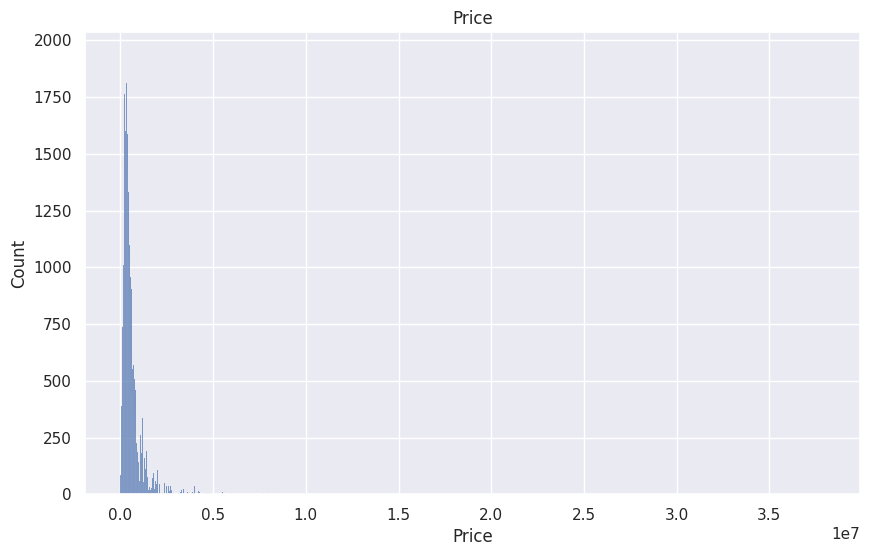

In [ ]:
#price
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(housing_data1['Price'])
plt.title('Price')
plt.show()


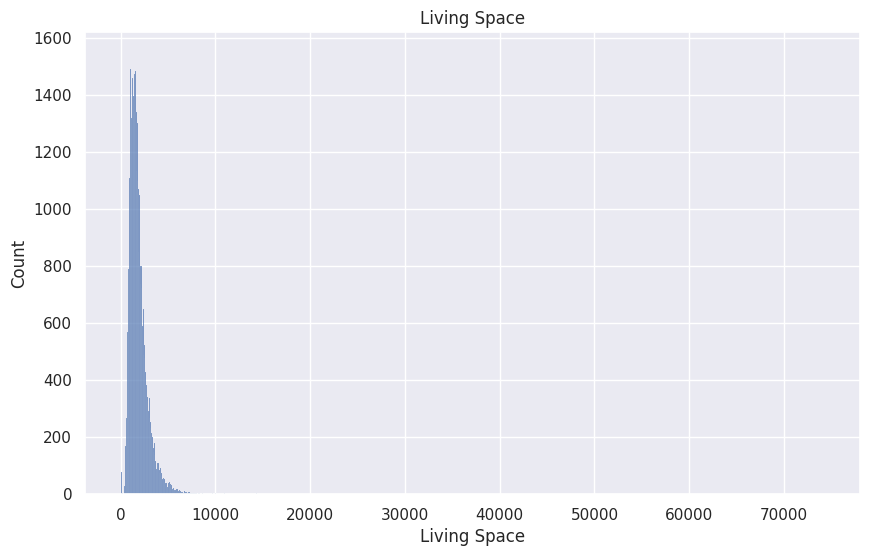

In [ ]:
#living space
plt.figure(figsize=(10,6))
sns.histplot(housing_data1['Living Space'])
plt.title('Living Space')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)


(39979, 8) (31983, 8) (7996, 8)


In [ ]:
print(x_train)

       Beds  Baths  Living Space  Zip Code Population  Zip Code Density  \
18075    16      8          4100                35886            2210.2   
10544     4      3          2200                41448             296.5   
23118     1      1           680                44056            3970.9   
4068      4      5          4825                45499             718.1   
14837     4      2          1350               107487            5888.0   
...     ...    ...           ...                  ...               ...   
31021     4      2          2668                66118             442.9   
30282     4      3          2889                18217             145.5   
6637      4      3          2489                35668            1680.8   
35345     2      3          1678                13810           10568.6   
23720     4      2          1267                54438             513.8   

       Median Household Income  Latitude  Longitude  
18075                  67620.0  30.00835  -90

In [ ]:
print(y_train)

18075     375000.0
10544     350000.0
23118     112500.0
4068      950000.0
14837     320500.0
           ...    
31021     459000.0
30282     875000.0
6637      340900.0
35345    2995000.0
23720     215000.0
Name: Price, Length: 31983, dtype: float64


modelling

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)#training algorithm

LinearRegression()

model evaluation

In [ ]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

In [ ]:
#R squared value
r2_train=metrics.r2_score(y_train, training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.439106253960153


In [ ]:
x_test.to_csv('housing_datayuh.csv',index=False)
from google.colab import files
files.do.csv download('housing_datayuh')

In [ ]:
input_data=(3,4,2300,49854,2196.2,141341.0,30.24298,-97.76537)
#changing the input data into numpy array
input_data_as_numpy_array=np.array(input_data)
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction[0])
print('Price',prediction[0])

1085184.4987435369
Price 1085184.4987435369


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
